In [11]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(rethinking))
suppressPackageStartupMessages(library(ggdag))
suppressPackageStartupMessages(library(dagitty))

theme_dag_dracula = function() {
    theme(
      plot.background = element_rect("#282A36"),
      panel.background = element_rect("#282A36"),
      panel.grid = element_blank(),
      axis.title = element_blank(),
      axis.text = element_blank(),
      axis.ticks = element_blank(),
    )
}


# Week 5 Notes

## Elemental Confounds
- Confounds are features of the sample
- Can mislead our understanding between variables
- 4 types of confounds
  - The Fork
  - The Pipe
  - The Collider
  - The Descendent 

## The Fork

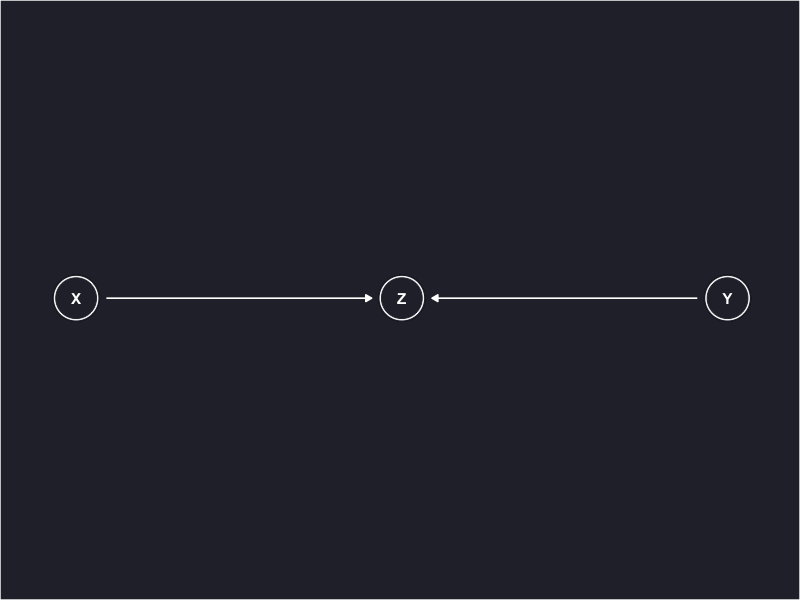

In [13]:
fork_dag = ggdag::dagify(
  Z ~ X,
  Z ~ Y,
  exposure = "Z",
  outcome = "Y",
  coords = list(
    x = c(X = -1, Z = 0, Y = 1),
    y = c(X = 0, Z = 0, Y = 0)
  )
)

ggdag::ggdag(fork_dag) +
  geom_dag_edges(edge_colour = "#ffffff") +
  geom_dag_node(colour = "#282A36") +
  geom_dag_text(colour = "#ffffff") +
  theme_dag_dracula()


In [25]:
n = 1e4
Z = rbern(n, 0.5)
X = rbern(n, (1-Z)*0.1 + Z*0.9)
Y = rbern(n, (1-Z)*0.1 + Z*0.9)

print(cor(X, Y))
print(cor(X[Z == 0], Y[Z == 0]))
print(cor(X[Z == 1], Y[Z == 1]))
print(lm(Y ~ X))

[1] 0.6464004
[1] -0.007824048
[1] 0.004273847

Call:
lm(formula = Y ~ X)

Coefficients:
(Intercept)            X  
     0.1762       0.6464  



In [36]:
main = lm(Y ~ X) %>% coef()
strat_1 = lm(Y[Z == 1] ~ X[Z == 1]) %>% coef()
strat_0 = lm(Y[Z == 0] ~ X[Z == 0]) %>% coef()

data = tibble(
  label = c("main", "z0", "z1"), 
  slope = c(main["X"], strat_0["X[Z == 0]"], strat_1["X[Z == 1]"]),
  intercept = c(main["(Intercept)"], strat_0["(Intercept)"], strat_1["(Intercept)"])
)

data

